# Map Development
A Jupyter Notebook to piece together how to best create the map with desired ui/ux


### TOC
- [Initial Data Form](#initialData)
- [UI/UX Goals](#uiGoals)
- [Data Stack and JS Libraries](#dataStackLibraries)
- [Process](#processing)
    - [Index.html Template](#htmlTemplate)
    - [Investigating](#investigate)
    - [Layer Opacity](#layerOpacity)
    - [Info Panel Development](#infoPanel)
    - [Mobile Queries](#mobileQueries)
    - [Dual Map Sync](#dualMapSync)
    - [For Styling Layer Visit the Catalog](#styling)

<a id='initialData'></a>
### Initial Data Form
All data files currently reside in json or geojson form within redlining-wealth-health-lexington/notebooks/data dir. Multiple files exist that have only the initial data sets. The final data files to use are

- race_cbtracts_hhi_own_val_pov_2019_gdf_json.json
- KYLexington1936.geojson

<a id='uiGoals'></a>
### UI/UX Goals
Full screen dual map  
Middle modal scrolling info panel   
Title center over top of map   
Top right north arrow  
Top right zoom button **(is this still necessary?)**  
Top right hide info button  
Bottom left slider bar to change opacity level of over lying HOLC neighborhood grades   
Top right menu drop down button to select which layer of data to view   
- % segregation/Race   
- Median household income   
- % population in poverty   
- home ownership %   
- property value reported  

<a id='dataStackLibraries'></a>
### Data Stack and JS Libraries

1. HTML/SVG/CSS for ui/ux and website styling  
    - Intend to use mini version of: 
        - [Assembly.css](https://www.mapbox.com/assembly/documentation/)
    - Alternative Options include:
        - [Bootstrap](http://getbootstrap.com/)
        - [HTML5 Boilerplate](https://html5boilerplate.com/)
        - [Skeleton Boilerplate](http://getskeleton.com/)
        - [Pure.css](https://purecss.io/)
        - [Materialize](http://materializecss.com/)
2. Mapbox GL for loading vector tiles and smooth interaction
3. D3.js to load data as json and convert to geojson 
2. Mapbox GL Opacity/Slider Plug In. Example:
    - [Github Demo Example](https://github.com/dayjournal/mapbox-gl-opacity)
    - [Mapbox GL JS Example](https://docs.mapbox.com/mapbox-gl-js/example/adjust-layer-opacity/?q=add%20map%20layer%20geojson&size=n_10_n) Chicago raster map   
5. chroma.js potentially for color scale?  or simply reference coolors and add hex codes
6. Initially considered sparkline.js for tooltip specs of data or graphing but, probably something newer and maintained should be considered.  
7. Could use mapshaper to simplify any files if size becomes issue
8. Buttons/Info Panels examples:
    - 673-5 repo (Kenyan Education Map)  
    - Lexington Public Parks Throuh Redlining Lense Map  
    - 675-5 for Mapbox GL JS (plant hardiness zone map)  

*Should most definitely write the scripts for inital run inside index.html but then pull them out as separate script files to call within the index.html and simplify/reduce the scripting within the index.html.

<a id='processing'></a>
### Process/Status

<a id='htmlTemplate'></a>
#### Index.html Template
Create index.html file template **DONE**
- Within the header links to various stylesheets are being utilized.  
- An external css/styles.css stylesheet is being used to store my personal modifications of styling for the map. **modify/refine to place ui/ux approprpiately and adjust for mobile/desktop**  
- Body currently has access to map.   
- Base map pulled from personal style sheet (**modify/refine* later this is just to get the visualization of the project going**)  
- Data is loaded through d3.json and acessible through addLayer function **add two layers at once**  
  - current map layer is generic to show capability to access layer  
- Zoom rotation/navigation control added through mapbox GL plugin **DONE**
- Title bar added via div element and css **modify/refine**  

<a id ='investigate'></a>
#### Investigating
When investigating the locally viewed map can do the following:
Use Developer tools to see styling that is being selected. Since using both a styles.css file to further modify the initially loaded assembly.min may need confirmation of what rules are being followed.

To undock the Developer tools from side bar/bottom bar follow [this](https://developer.chrome.com/docs/devtools/customize/placement/). Essentially open command menu for developer tools by short cut Control+Shift+P then type in one of these commands: Dock to left, Dock to right, Dock to bottom, Undock into separate window or Restore last dock position. To toggle Restore last dock position with a keyboard shortcut, press Control+Shift+D (Linux/Windows).From there Elements, Styles, Console can each have their own menu. 

Side note: when using Mapbox it uses something called a [*canvas*](https://developer.mozilla.org/en-US/docs/Web/API/Canvas_API) which can at times make it difficult to investigate. In this instance may need to load a plug-in during development and turn the plug off after developed (comment out it's code) for launch.

**Elements** allows determination of separate entities. 
Select the element (div-class etc that you want to investigate) in the menu section of Elements. Selection is confirmed by the shadow over the div item.

**Styles** allows determination of how the element is being styled. 
With an element selected, in the Styles menu the rules being applied will be displayed. The rules at the top of the styles menu overide those at the bottom. Those that are not being applied are typically striked thru text. Items that can't be changed are those ! important items.  

To see the full script of rules visit the url styles page linked at the top of the index.html (min.assembly url). The API of the url will explain more about accessing the elements and styling them further with appropriate commands.
https://api.mapbox.com/mapbox-assembly/v0.24.0/assembly.css
https://labs.mapbox.com/assembly/documentation/

Additional understanding of css vs flex box https://www.freecodecamp.org/news/css-positioning-and-flexbox-explained/

Can also select a rule within this menu and turn it on or off using the checkboxes to see how the rule affects the element on the page (without having to go back into the code immediately/editing/saving every single time.)

**Console** shows what the page has access to data wise.

Using the notes above was able to diagnose why I was having trouble moving the slider opacity bar to the bottom of the page. Turns out by classifying a div as *map-overly top* I was overriding any alternative rules I'd place in styles.css. Needed to change it to *map-overlay bottom* and add ml24 mb36 to push it off the bottom of the page.

<a id='layerOpacity'></a>
#### Layer Opacity
https://docs.mapbox.com/mapbox-gl-js/example/adjust-layer-opacity/ 

Followed guidance in this example to create opacity slider.
This slider is linked to the redlining neighborhood data so that underlying data for comparison by tract level can be seen and reviewed at the same time. This makes it much easier to compare the census tract level (since it doesn't exactly line up with redlining layer) without having to turn off and on or constant slide a mid screen bar back and forth. The slider has been perfect for use during development of a single map that would have all data layered on top of one another. Since deciding to show syncd maps instead this ui is no longer necessary. However, it will be a handy tool to help determine opacity of final layers to load prior to launch.
**Need to remove opacity slider prior to launch**

<a id='infoPanel'></a>
#### Info Panel Development
- info scrolling panel added needs extended to meet close to opacity slider
- info button available and connected to infoPanel using this [example](https://sebhastian.com/javascript-show-hide-div-onclick-toggle/#:~:text=To%20display%20or%20hide%20a,which%20is%20block%20)%20to%20none%20)

The scroll panel appears to be dipping below the map element. 
The intention is to have the map element fill the whole screen.
In an effort to determine why the panel dips below the map, added a background color to the body in styling. 

 `body {background: #2ecc71;}`  
 
Turns out the body is going longer than map too. When resizing the screen to narrower width the info panel goes longer down the page and it's filled the body with more of the green. 

 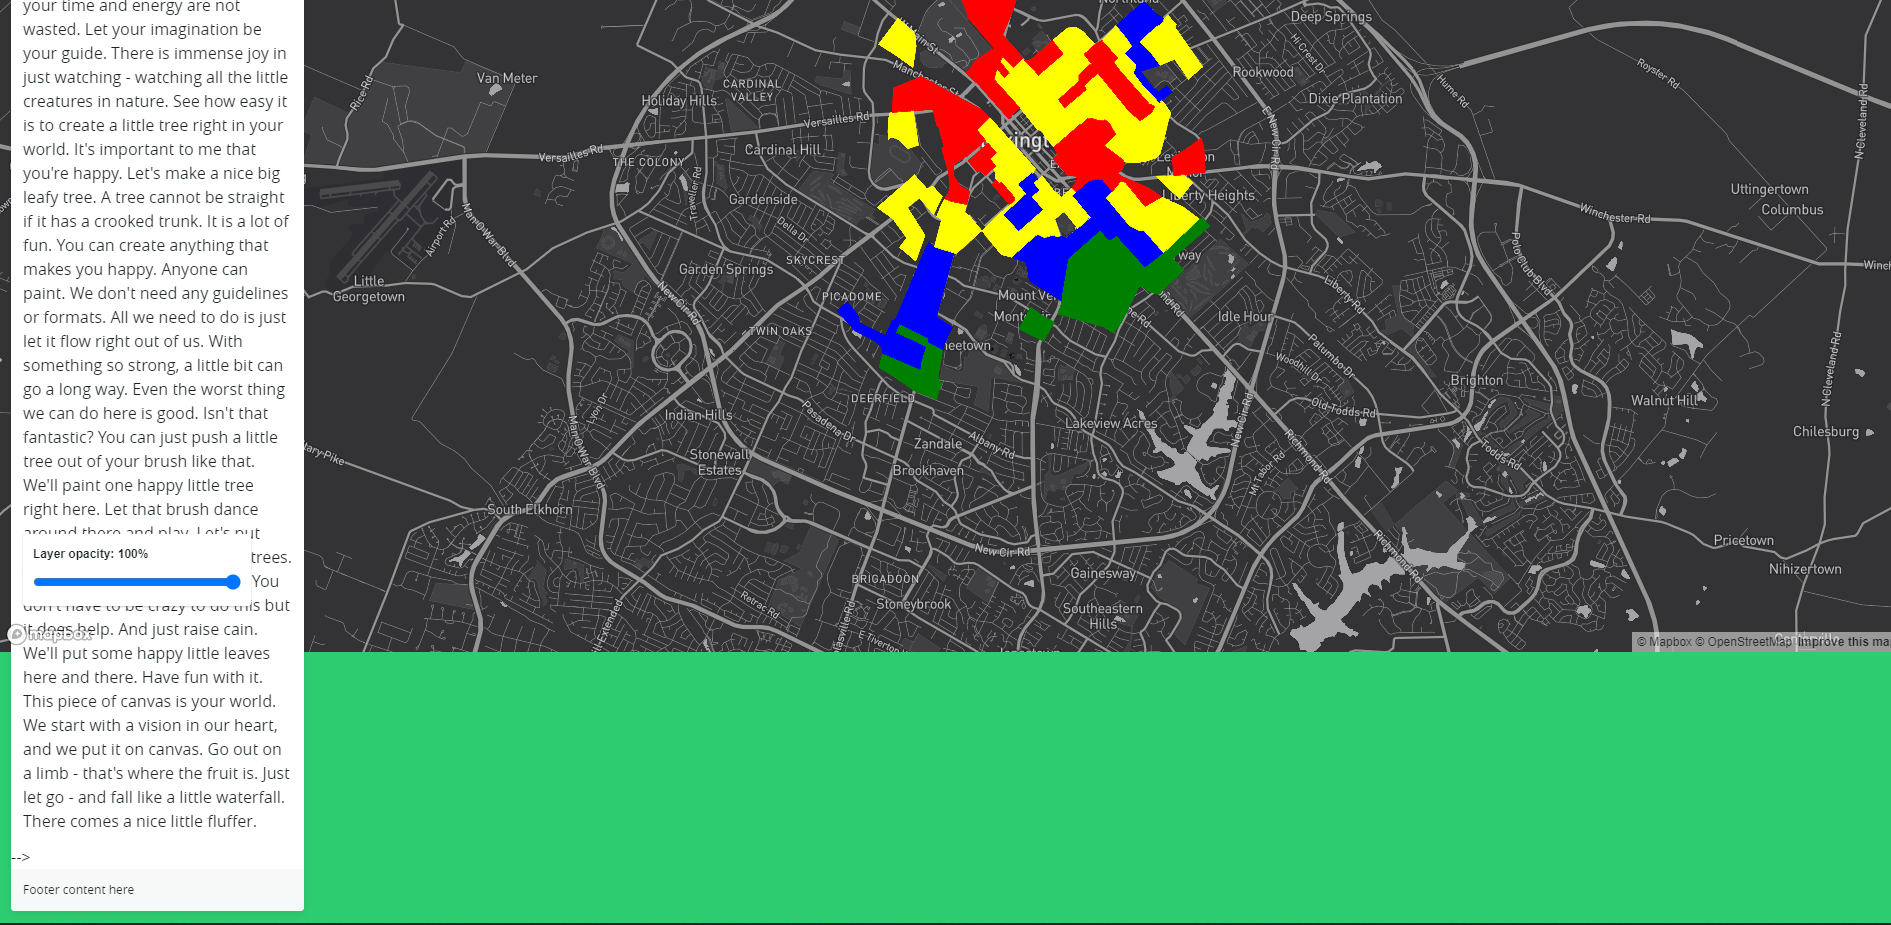

Thinking the body is inheriting something from the info panel since the text can't be hidden or scrolled? Turns out too many variations of heights were messing with the entire body from this scrolling text div class. Reduced it down to just `overflow-auto` for scrolling and `h-full` for height. 
 
 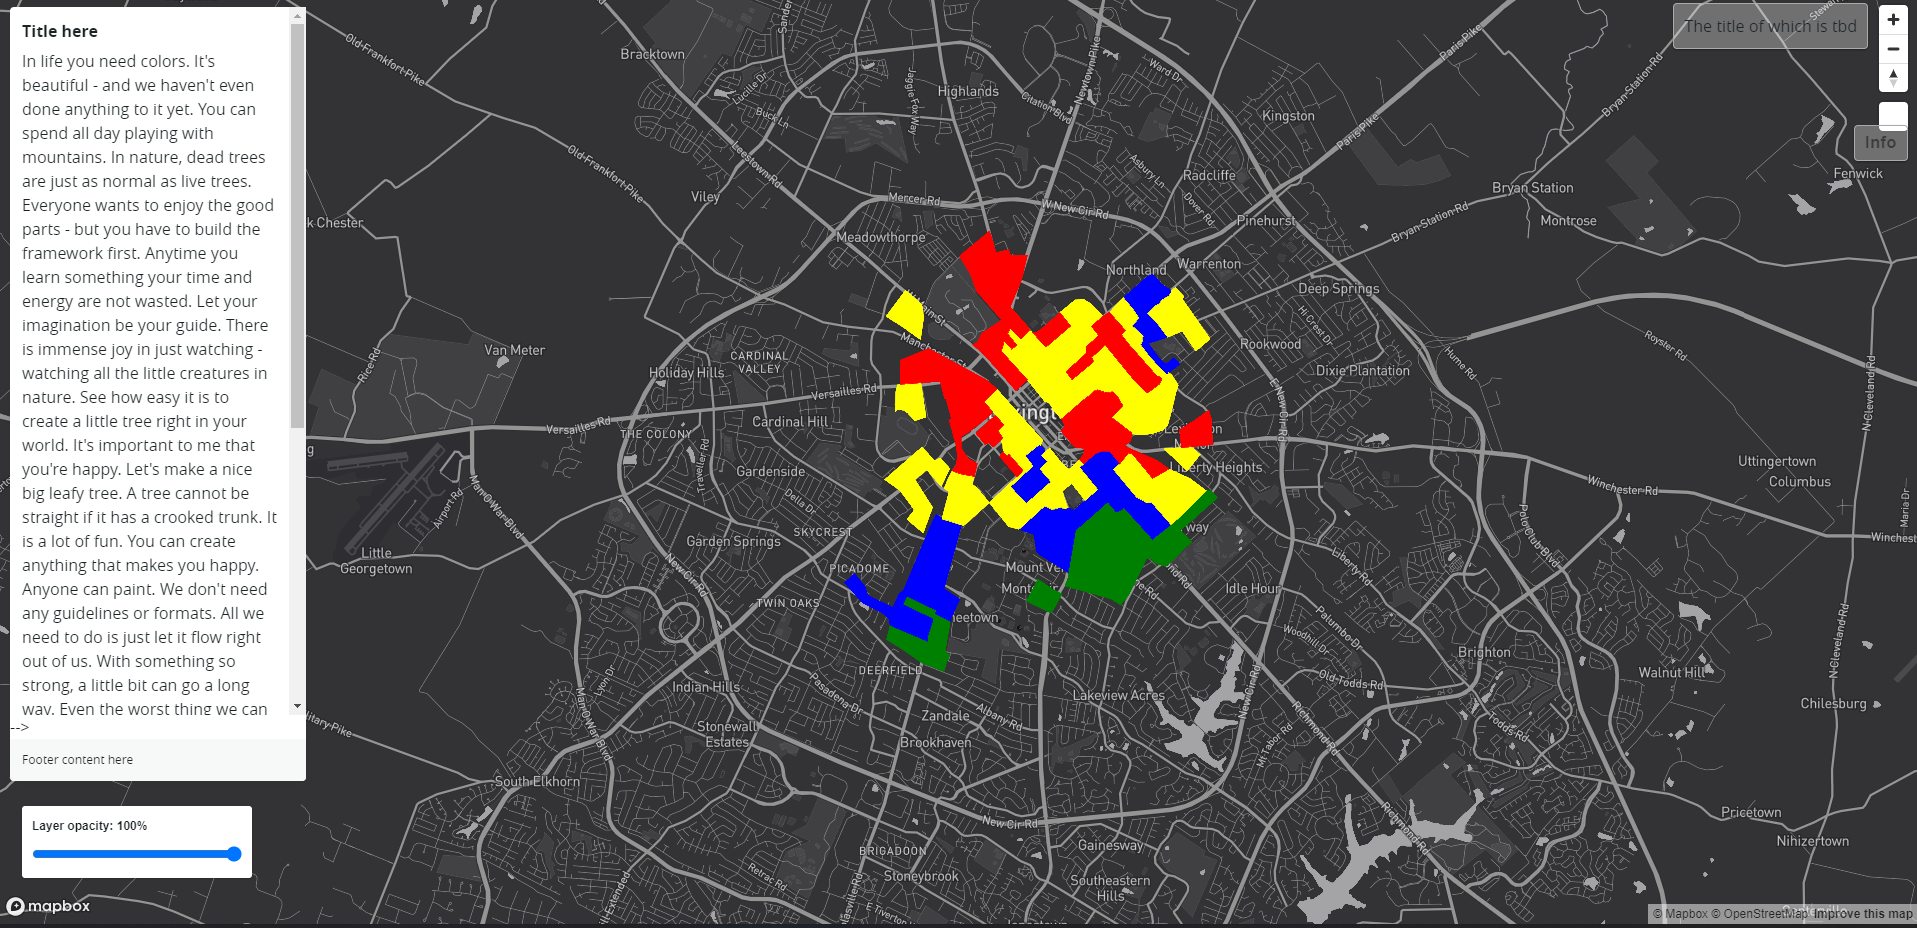

After the class meeting with Allison O'Flinn (UX, produce and visual designer) on 26 May 2022 where I received some feedback on my current draft I opted to split the screen with maps. Instead of having one map with all the layers piled on top of one another, without exactly overlapping contents, decided to split the screen between two maps and sync their movement.

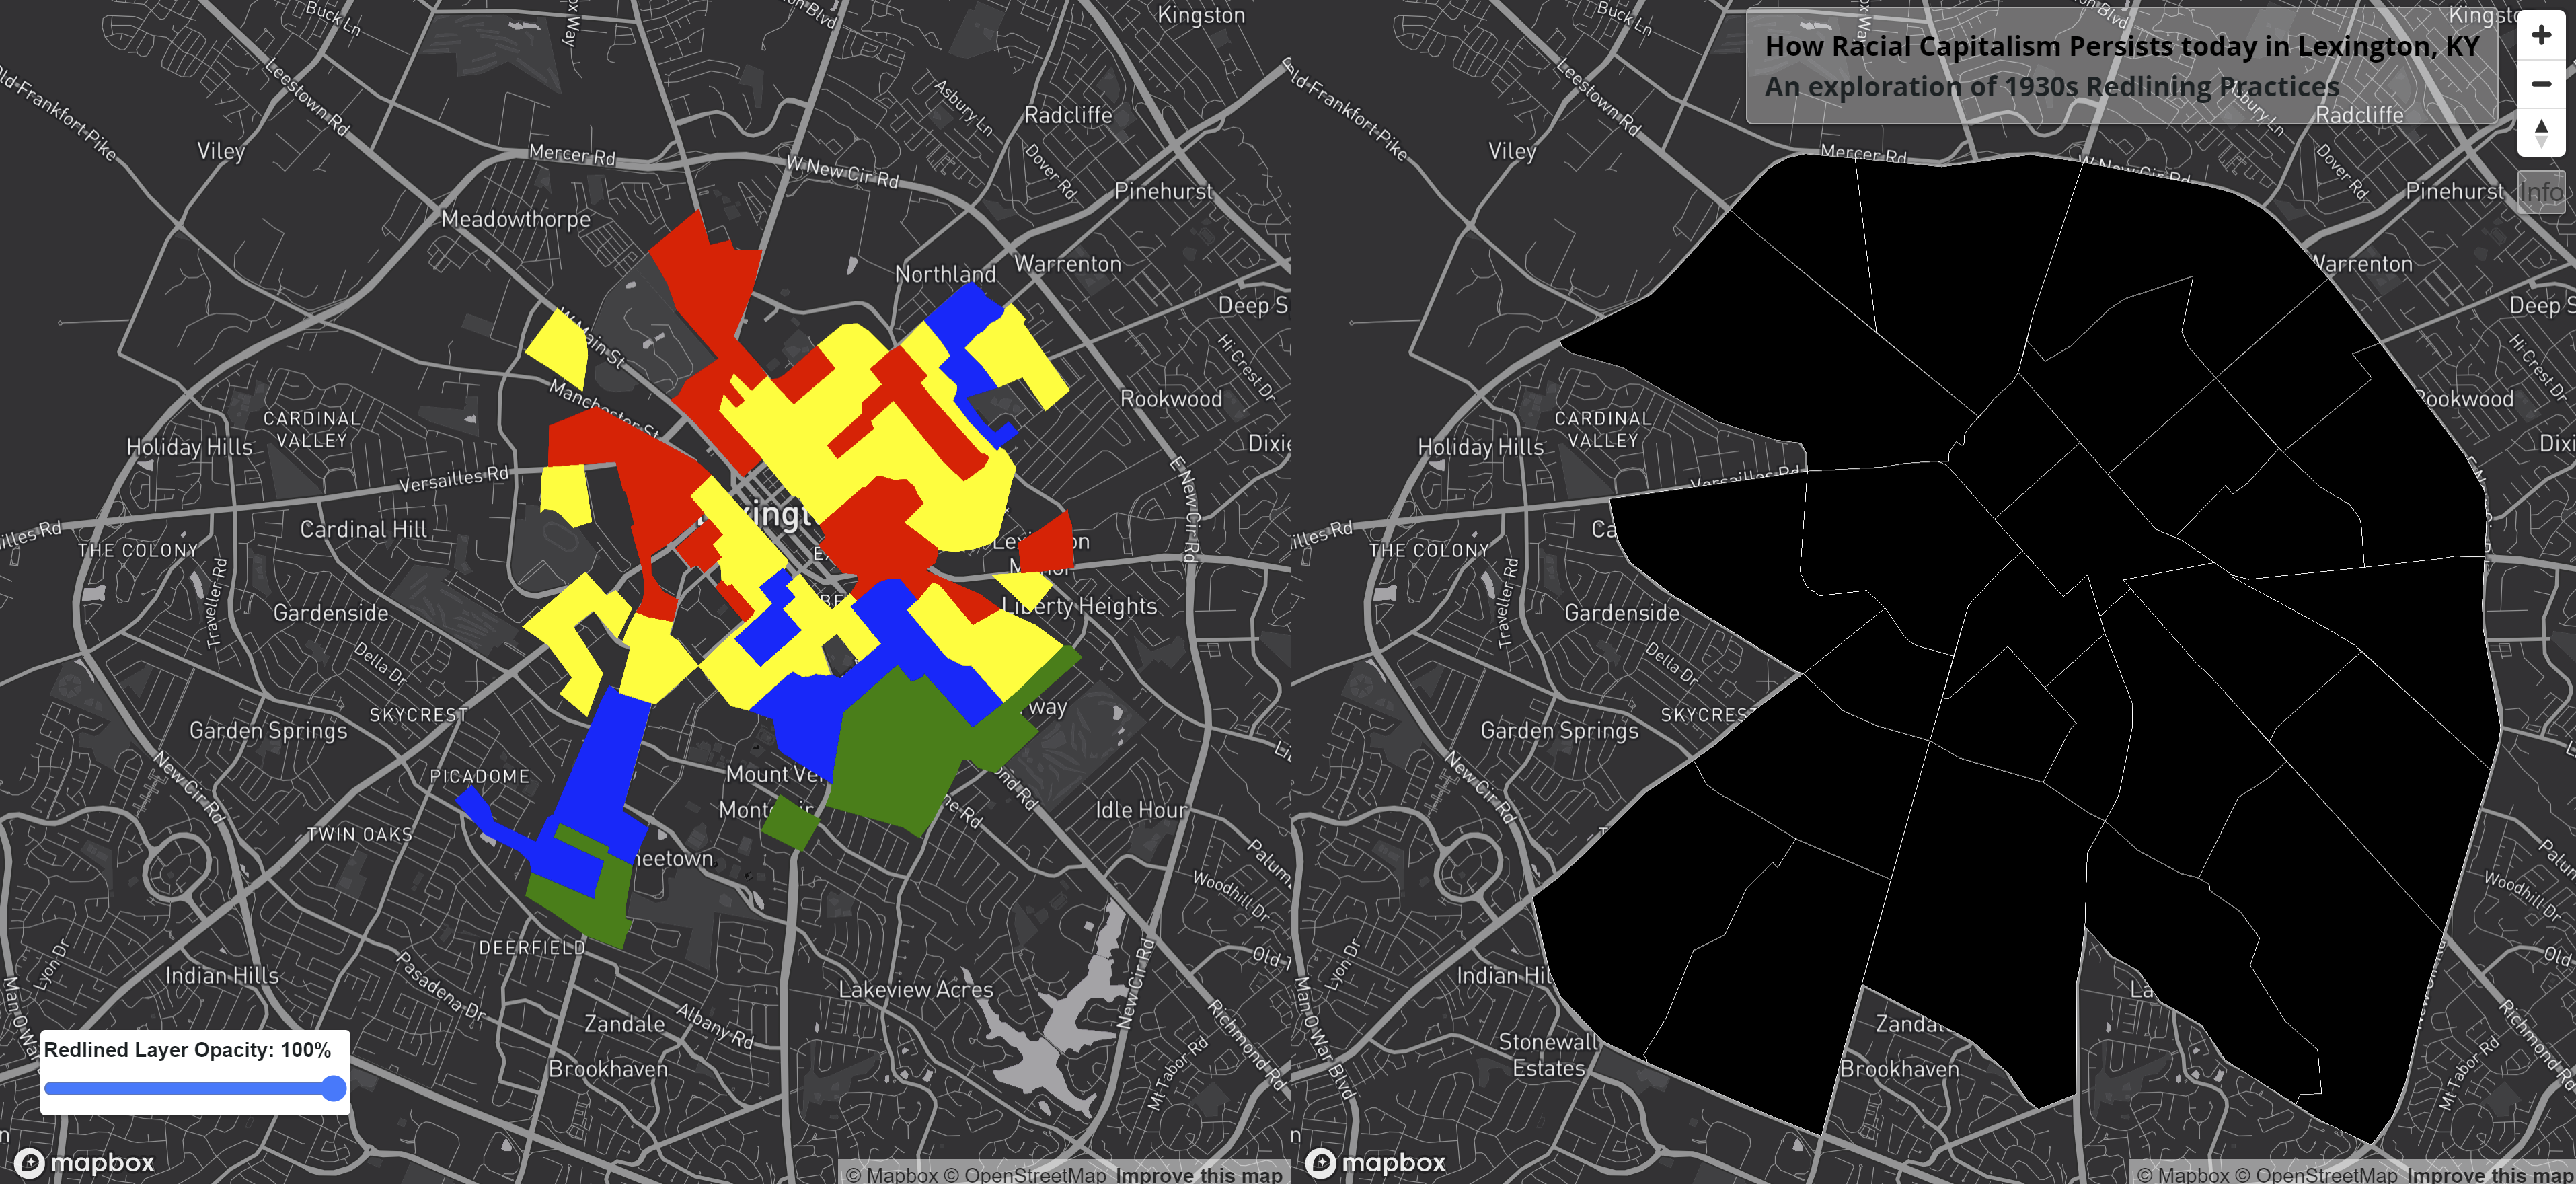

In doing this will now **need to turn info Panel into centered modal**. Alternative option is to use the info button to redirect user to the information on a github repo instead and keep this to strictly mapping.

Also the initial idea was data to load in the infoPanel from opening page, have decided better to load hidden and use info button to open up info panel. Understanding how to make it start [hidden](https://stackoverflow.com/questions/56111480/how-can-i-hide-a-div-until-a-button-is-clicked).        

Went from this code 
 //////////////////////////////////////////////////////////////////////////////////////////
 
 
body
<!-- info floating side panel -->
        <!-- <div id='infoPanel'> -->
            <!-- remember margins padding are referenced in the ml or px abberviations -->
            <!-- <div class='relative top-ml left z1 w-1/6 px12 py12-ml'> -->
                <!-- <div class='flex flex--column h-viewport-5/6 bg-white round-ml shadow-darken10 events-all'> -->
                    <!-- scrolling text -->
                    <!-- <div class='px12 py12 overflow-auto h-full'> -->
                        <!-- <h3 class='txt-m txt-bold mb6'>Title here</h3> -->
                        <!-- <p>In life you need colors. It's beautiful - and we haven't even done anything to it yet. You -->
                            <!-- can spend all day playing with mountains. -->
                            <!-- In nature, dead trees are just as normal as live trees. Everyone wants to enjoy the good parts - but you have to build the framework first. Anytime you learn something your time and energy are not wasted. Let your imagination be your guide. There is immense joy in just watching - watching all the little creatures in nature. -->
                            <!-- See how easy it is to create a little tree right in your world. It's important to me that
                            you're happy. Let's make a nice big leafy tree.
                            A tree cannot be straight if it has a crooked trunk. It is a lot of fun. You can create
                            anything that makes you happy. Anyone can paint. We don't need any guidelines or formats.
                            All we need to do is just let it flow right out of us.
                            With something so strong, a little bit can go a long way. Even the worst thing we can do
                            here is good. Isn't that fantastic? You can just push a little tree out of your brush like
                            that. We'll paint one happy little tree right here. Let that brush dance around there and
                            play.
                            Let's put some highlights on these little trees. The sun wouldn't forget them. You don't
                            have to be crazy to do this but it does help. And just raise cain. We'll put some happy
                            little leaves here and there.
                            Have fun with it. This piece of canvas is your world. We start with a vision in our heart,
                            and we put it on canvas. Go out on a limb - that's where the fruit is. Just let go - and
                            fall like a little waterfall. There comes a nice little fluffer.
                        </p>
                    </div> -->

                    <!-- <footer class='px12 py12 bg-gray-faint round-b-ml txt-s'> -->
                    <!-- Footer content here -->
                    <!-- </footer> -->
                <!-- </div> -->
            <!-- </div> -->
        <!-- </div> -->

script
        // select infoPanel using infoButton with click event listener to hide or display infoPanel
        // const targetInfoPanel = document.getElementById('infoPanel');
        // targetInfoPanel.style.display = 'none';

        // const ibtn = document.getElementById('infoButton');
        // ibtn.onclick = function () {
        //     if (targetInfoPanel.style.display !== 'block') {
        //         targetInfoPanel.style.display = 'block';
        //     } else {
        //         targetInfoPanel.style.display = 'none';
        //     }
        // };

////////////////////////////////////////////////////////////////////////////////////////////        
To what is on index.html for modal instead. 

inspiration https://www.w3schools.com/howto/tryit.asp?filename=tryhow_css_modal
https://www.w3schools.com/howto/howto_css_modals.asp

<a id='mobileQueries'></a>
#### Mobile Queries
Working on making website mobile friendly to start then scaling up from there. Now that there is a template to for appearance it's time to make sure it works for mobile. Since I've landed on a split screen for larger device, need to make split screen for mobile as well.  

Goal: Larger devices split 50/50 left and right
        Mobile-devices split 50/50 top and bottom

Using [Assembly.css](https://labs.mapbox.com/assembly/) rules about media queries within index.thml
Mobile-first media queries = fewer overrides. Start with a simple mobile layout, then add complexity with additional media-constrained rules.  

- Assembly uses the following media queries if using withing index.html:  

    - Extra large screens: screen and (min-width: 1200px); Class affected by xl  
    - Large screens: screen and (min-width: 800px); Class affected by l  
    - Medium screens: screen and (min-width: 640px); Class affected by m  
    - Classes that take affect within certain media queries always end with a -m <size> suffix, where "size" is m, l, or xl.  
    
Also have layout scales [here](https://labs.mapbox.com/assembly/layout-scales/) for margins, paddings, widths, heights.  
    
Visit github [page](https://github.com/mapbox/assembly)  

Using [W3](https://www.w3schools.com/cssref/css3_pr_mediaquery.asp) for understanding basics of media queries and how to style hardcoded within css style sheet. This site is also good for understanding the *not* *and* *or* portion of media queries.
    
I opted to modify split of screen within css hardcoded and not within html as it's easier to work with all in one space. 
Added 'and' orientation query to determine if landscape/portrait to the media query statements as some devices would look better with screen size and position considered.

`/* Small devices (portrait orientation, 576px and up) */
/* for 50/50 split vertical top/bottom */
@media (min-width: 300px) and (orientation: portrait) {
#displayContainer {height: 100%;}
#map {position: absolute; top: 0; width: 100vw ; height: 50vh; background: pink; z-index: -1;}
#map2{position: absolute; bottom: 0; width: 100vw; height: 50vh; background: #448ee4; z-index: -1;}
}`

<a id='dualMapSync'></a>
#### Dual Map Sync
This is a better solution to viewing multiple sets of data at the same time as opposed to the opacity slider. 

Duplicated the code for first map and modified json being laoded by d3 to that of census data (map2).

![image-2.png](attachment:image-2.png)

Created a function to get the center/zoom of each map in relation to the other map. 

![image.png](attachment:image.png)

Finally called the function within the map2.on load function.




<a id='titleBar'></a>
#### Title to Navigational Bar
With the dual syncing maps and the constant replacement of locating zoom or info button, going to turn title bar into a responsive navigation menu. This will keep everything in one place, prevent interupting the user's experience with relocating and shuffling buttons or icons around.

Also leaning into the inutitiveness of users to not need a zoom +/- button anymore. Removing to conserve space for mobile users.

[W3](https://www.w3schools.com/css/css_navbar_horizontal.asp) has great instructions regarding this.
[mapbox assembly](https://labs.mapbox.com/assembly/examples/navigation/) examples

- Include:
    - Jessica's map has nice looking nav bar
    - Drop down navbar for selecting layers to census bureau map
    - Responsive top nav for media queries of smaller screens
    - Navbar will be fixed to top of page to maintain consistentcy between screen sizes
    - Right align within nav bar for information button/menu drop down to separate from title

#### Adding buttons
Migrate Info Panel Button to nav bar. May add a link to this back to github repo to store historical info if the modal disrupts the user interaction. **need to reference my portfolio page for modal guidance** 

Notes on styling the buttons using assembly.css

https://www.w3schools.com/css/tryit.asp?filename=trycss_dropdown_navbar2 to add drop down to nav bar layer button for selecting which layer of census bureau data to visualize

<a id='selectData'></a>
#### Adding interactivity to nav bar menu layer
Need to be able to click between the different layers of census bureau data.
To do so will need to create functions to

Some sort of version or function for each of these
updateMap()

Determine how to color census bureau data dyanmically in js based on data within geojson utilizing stops:
https://blog.mapbox.com/data-driven-styling-for-fill-layers-in-mapbox-gl-js-80bb5292af4e 
This eliminates the necessity of getting specific class breaks, as you can assign them and the colors yourself.

addLegend()
updateLegend()

Examples of this as vanilla js can be found map675-mod5.
https://docs.mapbox.com/mapbox-gl-js/example/toggle-layers/ show hide layers example ITS IN HERE SOMEWHERE!!!!
https://docs.mapbox.com/mapbox-gl-js/example/color-switcher/ click button to select layer, click color to change color

// Feel like there's something in here for accessing what layerId, source, sourceLayer is in order to change it
function setLayerSource (layerId, source, sourceLayer) {
    const oldLayers = map.getStyle().layers;
    const layerIndex = oldLayers.findIndex(l => l.id === layerId);
    const layerDef = oldLayers[layerIndex];
    const before = oldLayers[layerIndex + 1] && oldLayers[layerIndex + 1].id;
    layerDef.source = source;
    if (sourceLayer) {
        layerDef['source-layer'] = sourceLayer;
    }
    map.removeLayer(layerId);
    map.addLayer(layerDef, before);
}

// Feel like there' something in here for a click event to focus the menu button click on the menu and then change to the layerID, source, sourceLayer desired
for (const color of colors) {
const swatch = document.createElement('button');
swatch.style.backgroundColor = color;
swatch.addEventListener('click', () => {
map.setPaintProperty(layer.value, 'fill-color', color);
});
swatches.appendChild(swatch);
}

map click events
https://docs.mapbox.com/mapbox-gl-js/api/events/


The goal is to be able to connect the click of navbar layer, to updatethe map, then when the legend is added it is updated...

<a id='styling'></a>
#### For Styling later visit the catalog
https://labs.mapbox.com/assembly/catalog/
Full screen view of it in action http://bl.ocks.org/boeric/raw/f6ddea14600dc5093506/

**add popups?**
https://docs.mapbox.com/mapbox-gl-js/example/polygon-popup-on-click/

MODAL
make absolute positioning to take out of flow of everything else
try to center for rest of page

Add legend Dynamically 
Options for brainstorming
https://medium.com/random-gis-talks/add-legends-in-mapbox-gl-js-dynamically-3782d6f5d74
https://docs.mapbox.com/mapbox-gl-js/example/updating-choropleth/
https://docs.mapbox.com/mapbox.js/example/v1.0.0/custom-legend/

Most talk about using some form of map.getStyle().layers to find an array of all layers included on my map. 
Then save that array as a const and use its individual properies to create <div> and <span> of legend
    
If writing code long hand, could create a legend element for each layer (4 different legends), with their colors hard coded in to match the colors within the ma.paddLayer paint properties, each legend would be set to display none or visibility none. Then based on click event the correct legend would be added .....
    
Interesting find https://github.com/mapparatus/legend-symbol
    Here they use code to access the style and layers. Something feels right about acessing after it is loaded. now need to pass this information into the build of the legend.

so a function to get teh style and layers    

function whatsMapsStyles() {
    //where 'map' is a mapbox-gl map instance
    const style = map.getStyle();
    const layer = style.layers[2];
    updateLegend(mapsStyles)
}
    
then at the end of this function need to call an other function to update the legend to reflect the styles.
    
function updateLegent(mapsstyles) {
    
    }